In [1]:
# importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

In [3]:
iris=datasets.load_iris()

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


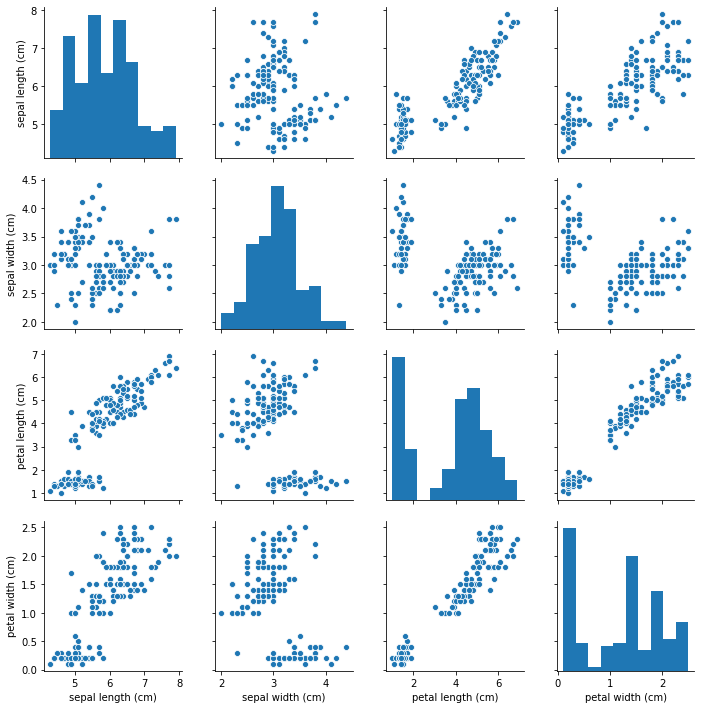

In [6]:
sns.pairplot(df)

In [7]:
x = df.iloc[:, [0, 1, 2, 3]].values

# let's check the shape of x
print(x.shape)

pd.DataFrame(x).head()
df.iloc[:, [0, 1, 2, 3]].head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

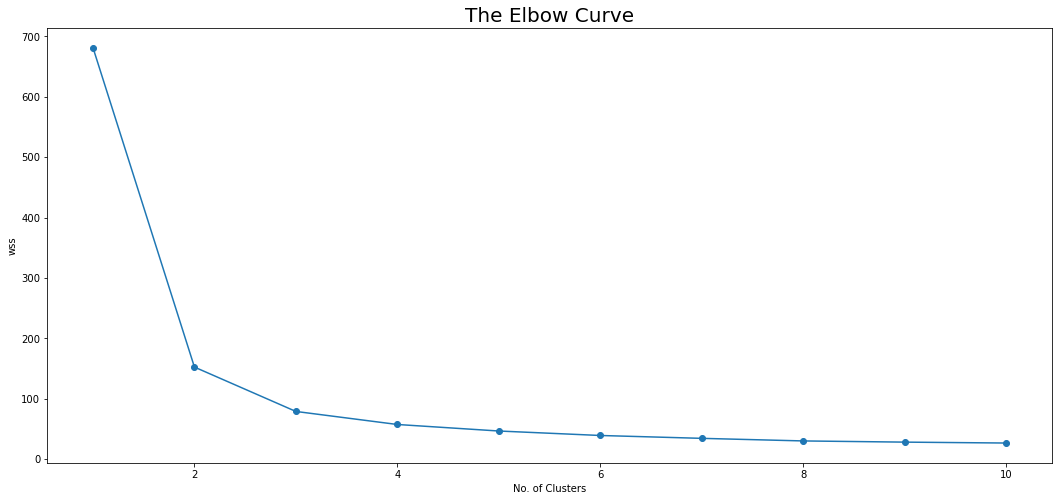

In [9]:
from sklearn.cluster import KMeans

wss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(x)
    wss.append(km.inertia_) 
    # inertia_ is the sum of squared dist from closest cluster

plt.figure(figsize=(18,8))
plt.plot(range(1, 11), wss, marker = 'o')
plt.title('The Elbow Curve', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wss')
plt.show();

In [10]:
print(km.cluster_centers_)

[[4.81818182 3.23636364 1.43333333 0.23030303]
 [6.02777778 2.73333333 5.02777778 1.79444444]
 [7.64285714 3.22857143 6.5        2.2       ]
 [5.96875    2.8625     4.4125     1.38125   ]
 [6.56190476 3.11428571 5.52380952 2.18095238]
 [5.37058824 3.8        1.51764706 0.27647059]
 [7.15       2.9        5.98333333 1.83333333]
 [5.         2.3        3.275      1.025     ]
 [6.65454545 3.04545455 4.66363636 1.47272727]
 [5.57647059 2.59411765 3.98235294 1.21764706]]


In [11]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

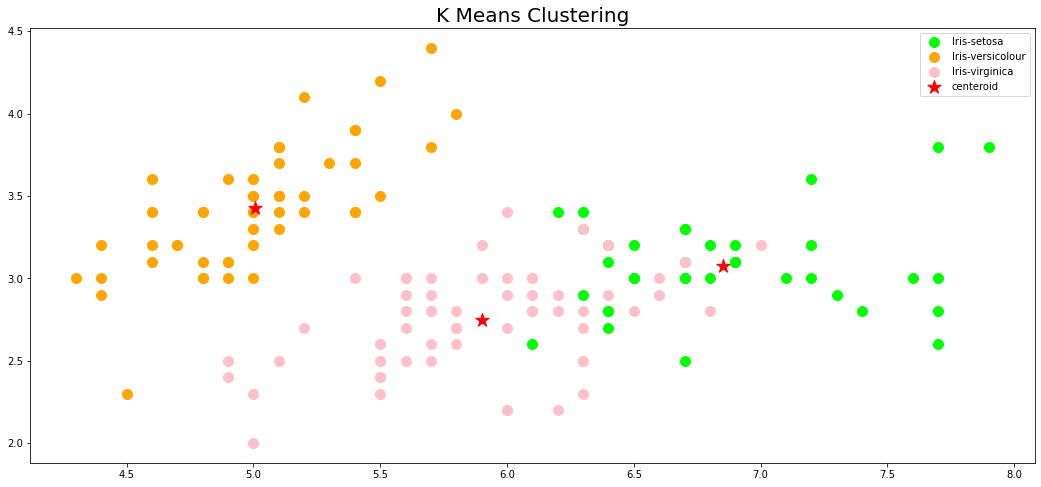

In [13]:
km = KMeans(n_clusters = 3, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(18,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'lime', label = 'Iris-setosa')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'pink', label = 'Iris-virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200, c = 'red' , label = 'centeroid', marker='*')


plt.title('K Means Clustering', fontsize = 20)
plt.legend()
plt.show();